<a href="https://colab.research.google.com/github/yerinsally/BDA/blob/main/%EC%A0%95%EC%98%88%EB%A6%B0_0319_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 필수과제 1 : 로그 스케일링
- 로그 스케일링 : 왜도 첨도를 비교시 한쪽으로 값이 치우친 경우에 사용한
- 로그스케일링 대한 개념, 예시 코드 , 주석

### 개념
로그변환(Log transformation)
- 로그변환을 통해 왜도와 첨도를 가진 변수를 정규분포에 가깝게 만들어준다. (큰 수치를 같은 비율의 작은 수치로 변환하는 것)
- 로그변환하기 전에, seaborn의 displot으로 왜도와 첨도를 확인!

로그변환과 스케일링의 차이
- 로그 변환 : 개별 feature, target의 분포도의 skew가 심할 경우 사용
- Standara Scaler : 선형기반의 ML 입력 데이터들에 대해서 다 적용, 전체 feature들에 다 적용 가능

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 보스턴 집값 데이터 가져오기기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BDA 5기/data/train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
# skewness 확인
df['LotArea'].skew()

12.207687851233496

<Axes: xlabel='LotArea', ylabel='Density'>

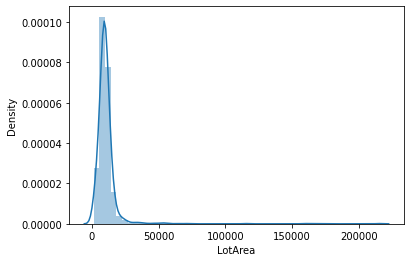

In [4]:
# KDE plot 확인
sns.distplot(df['LotArea'])

skewness 값이 매우 높으며 그래프는 좌측으로 편향되어 있는 것을 확인할 수 있다. 이것을 positive skewness 혹은 left skewness라고 한다.

In [5]:
# 최솟값 확인
df['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [6]:
# 로그 변환
df_log = np.log(df['LotArea'])

In [7]:
# skewness 확인
print(df_log.skew())

-0.1379938086958118


로그를 취해 변환하고 skew를 확인하니 12.x 에서 -0.1x 정도로 0에 가까운 왜도(skewness)가 나온다.

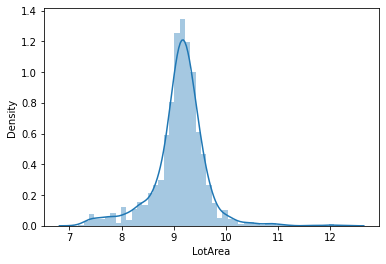

In [8]:
# KDE plot 출력
sns.distplot(df_log);

## 필수과제 2 : call data
- 해당 데이터를 본인의 로직으로 전처리를 진행
- 머신에 바로 학습할 수 있는 데이터 전처리 형태로 만들어서 CSV파일로 저장
- 전처리하면서 꼭 로직을 정확하게 정리하고 해당 로직에 대한 주석처리도 코드와 함께 정리

In [9]:
# call_data 불러오기
df_2 = pd.read_csv('/content/drive/MyDrive/[BDAA 5기] 데이터 분석 기초반/데이터셋/call_data.csv')
df_2

,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
0,TRAIN_00000,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0
1,TRAIN_00001,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0
2,TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0
3,TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0
4,TRAIN_00004,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,2.80,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30195,TRAIN_30195,263,80,289.6,201,21.8,280.5,323,29.88,208.0,66,9.28,2,0
30196,TRAIN_30196,283,81,210.7,280,90.5,284.1,202,32.80,287.8,203,6.28,2,0
30197,TRAIN_30197,24,0,222.4,33,22.1,233.9,32,22.22,293.6,95,4.22,2,0
30198,TRAIN_30198,63,1,262.4,202,29.6,280.6,282,28.88,280.9,207,20.88,2,1


In [10]:
# describe
df_2.describe()
# feature마다 평균, 표준편차, 최솟값 등이 매우 다른 것 확인 가능

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
count,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000
mean,159.732649,12.037815,250.563457,159.175728,41.091447,263.247215,158.474536,25.394260,263.438285,157.047417,12.074648,2.288079,0.109868
std,123.752781,24.925334,84.403350,101.573057,23.179017,74.064922,102.200293,8.146126,73.778416,101.721601,9.414261,2.050746,0.312730
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,20.800000,20.000000,1.040000,0.000000,0.000000
25%,63.000000,0.000000,222.800000,88.000000,24.400000,223.700000,87.000000,22.220000,223.700000,87.000000,4.700000,2.000000,0.000000
50%,118.000000,1.000000,234.000000,117.500000,30.800000,243.000000,112.000000,23.320000,242.800000,108.000000,9.080000,2.000000,0.000000
75%,228.000000,22.000000,289.600000,223.000000,45.900000,290.300000,223.000000,28.820000,290.500000,222.000000,20.290000,2.000000,0.000000
max,2212.000000,1112.000000,481.900000,489.000000,118.600000,481.600000,489.000000,49.980000,481.800000,490.000000,44.980000,11.000000,1.000000


In [11]:
# info()
df_2.info() # Null 값 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30200 entries, 0 to 30199
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       30200 non-null  object 
 1   가입일      30200 non-null  int64  
 2   음성사서함이용  30200 non-null  int64  
 3   주간통화시간   30200 non-null  float64
 4   주간통화횟수   30200 non-null  int64  
 5   주간통화요금   30200 non-null  float64
 6   저녁통화시간   30200 non-null  float64
 7   저녁통화횟수   30200 non-null  int64  
 8   저녁통화요금   30200 non-null  float64
 9   밤통화시간    30200 non-null  float64
 10  밤통화횟수    30200 non-null  int64  
 11  밤통화요금    30200 non-null  float64
 12  상담전화건수   30200 non-null  int64  
 13  전화해지여부   30200 non-null  int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 3.2+ MB


In [12]:
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings("ignore")

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

mpl.rcParams['axes.unicode_minus'] = False

NanumBarunGothic


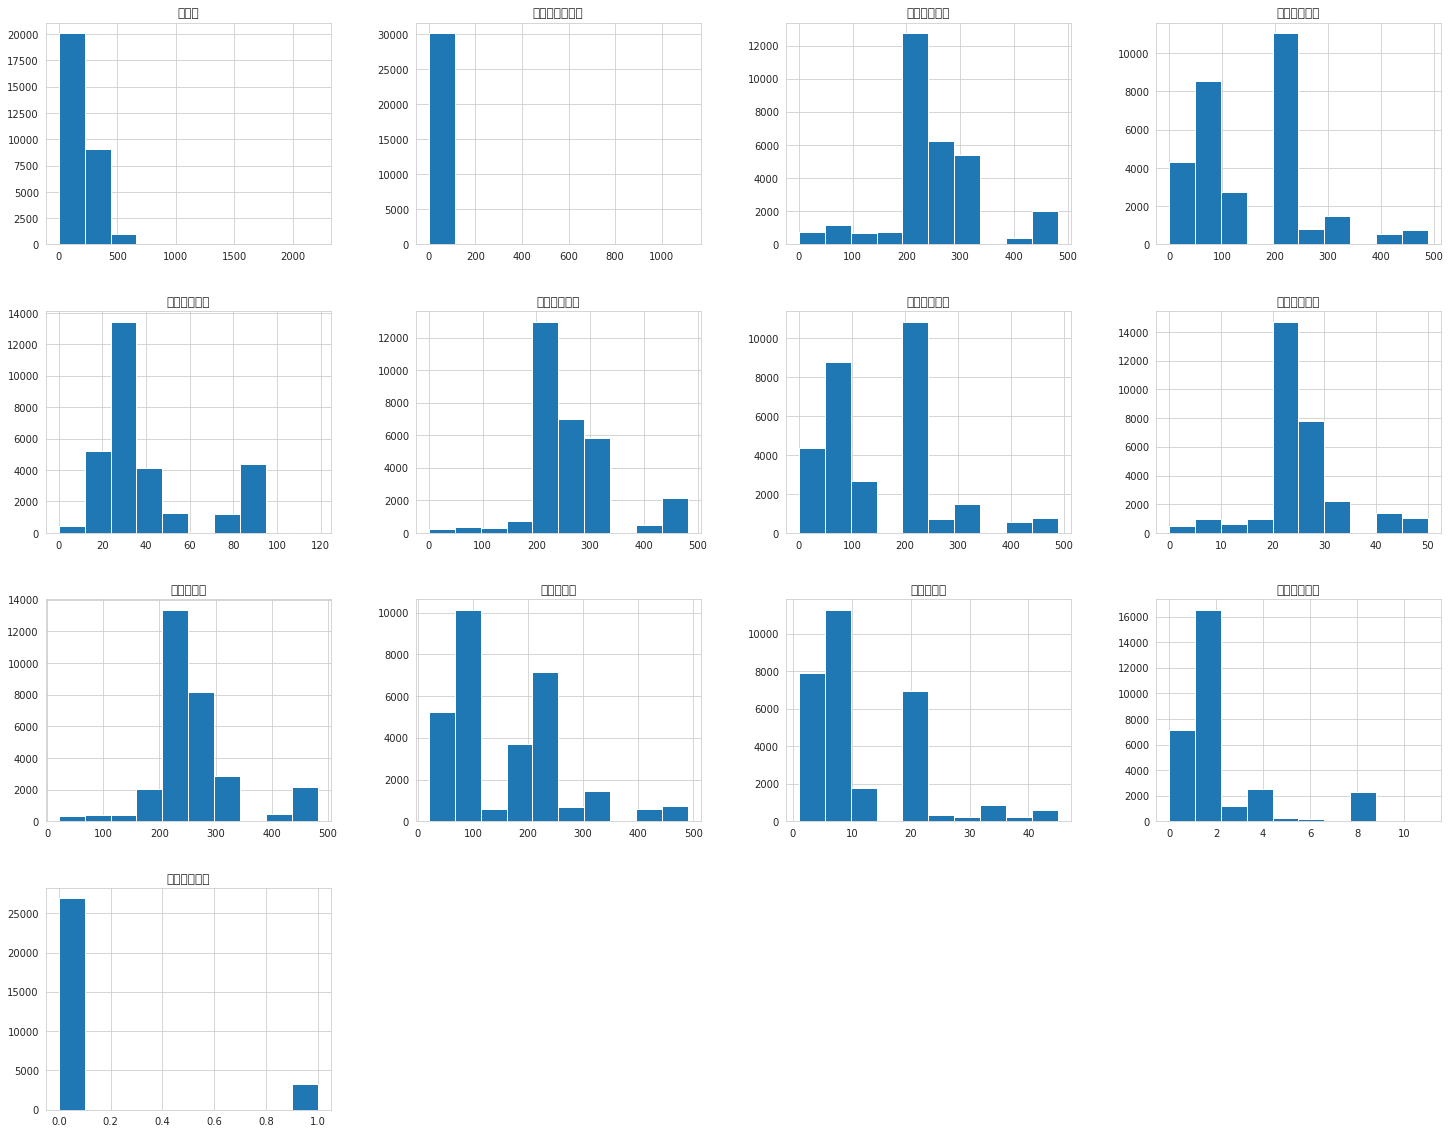

In [13]:
plt.rcParams['figure.figsize'] = [20, 10]
df_2.hist(figsize=(25,20));

In [14]:
# StandardScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
df_new = df_2.drop(['ID'],axis= 'columns')
# StandardScaler객체 생성
scaler = StandardScaler()
# StandardScaler로 데이터 세트 변환. fit()과 transform() 호출.
scaler.fit(df_new)
df_scaled = scaler.transform(df_new)

# transform()시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
df_scaled = pd.DataFrame(data=df_scaled, columns=['가입일','음성사서함이용','주간통화시간','주간통화횟수',
                                                  '주간통화요금','저녁통화시간','저녁통화횟수','저녁통화요금',
                                                  '밤통화시간','밤통화횟수','밤통화요금','상담전화건수','전화해지여부'])
print('feature 들의 평균 값')
print(df_scaled.mean())
print('\nfeature들의 분산 값')
print(df_scaled.var())

feature 들의 평균 값
가입일       -5.552586e-17
음성사서함이용    1.882232e-18
주간통화시간    -2.042222e-16
주간통화횟수    -1.294035e-16
주간통화요금    -8.705325e-17
저녁통화시간     2.446902e-16
저녁통화횟수    -1.317563e-16
저녁통화요금     5.646697e-17
밤통화시간     -1.172866e-16
밤통화횟수      2.823349e-18
밤통화요금      3.999744e-17
상담전화건수     1.444613e-16
전화해지여부     3.482130e-17
dtype: float64

feature들의 분산 값
가입일        1.000033
음성사서함이용    1.000033
주간통화시간     1.000033
주간통화횟수     1.000033
주간통화요금     1.000033
저녁통화시간     1.000033
저녁통화횟수     1.000033
저녁통화요금     1.000033
밤통화시간      1.000033
밤통화횟수      1.000033
밤통화요금      1.000033
상담전화건수     1.000033
전화해지여부     1.000033
dtype: float64


In [15]:
df_scaled

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
0,1.367809,-0.482963,-1.793364,-0.651519,-0.595007,0.074973,-0.885282,0.432819,-0.007296,1.680621,2.211081,-0.140478,-0.351324
1,-1.274600,2.726676,0.868896,1.612898,1.838269,0.083074,1.639215,0.821967,0.804608,0.510741,2.150534,-0.140478,-0.351324
2,-0.539251,0.640411,0.377201,1.612898,-0.297319,-0.759444,1.600075,0.911582,0.235326,1.680621,-0.403081,-1.115749,-0.351324
3,0.511248,-0.442843,-0.345531,0.628369,-0.689922,-0.408395,-0.953776,-0.183435,-0.808357,0.756514,-0.288360,-1.115749,-0.351324
4,0.503168,-0.482963,-1.827724,0.618523,-0.534606,-0.531262,-0.875497,0.329701,-0.004585,0.648374,-0.985186,2.785335,-0.351324
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30195,0.834479,2.726676,0.462508,0.411772,-0.832294,0.232945,1.609860,0.550668,-0.751428,-0.895080,-0.296858,-0.140478,-0.351324
30196,0.996094,2.766797,-0.472305,1.189550,2.131642,0.281552,0.425891,0.909127,0.330207,0.451756,-0.615528,-0.140478,-0.351324
30197,-1.096823,-0.482963,-0.333683,-1.242237,-0.819351,-0.396243,-1.237537,-0.389671,0.408822,-0.609983,-0.834349,-0.140478,-0.351324
30198,-0.781673,-0.442843,0.140240,0.421618,-0.495778,0.234295,1.208681,0.427909,0.236682,0.491080,0.935336,-0.140478,2.846378


In [16]:
# 레이블(y)인 전화해지여부 컬럼은 삭제함
df_scaled = df_scaled.drop(['전화해지여부'], axis='columns')
df_scaled

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수
0,1.367809,-0.482963,-1.793364,-0.651519,-0.595007,0.074973,-0.885282,0.432819,-0.007296,1.680621,2.211081,-0.140478
1,-1.274600,2.726676,0.868896,1.612898,1.838269,0.083074,1.639215,0.821967,0.804608,0.510741,2.150534,-0.140478
2,-0.539251,0.640411,0.377201,1.612898,-0.297319,-0.759444,1.600075,0.911582,0.235326,1.680621,-0.403081,-1.115749
3,0.511248,-0.442843,-0.345531,0.628369,-0.689922,-0.408395,-0.953776,-0.183435,-0.808357,0.756514,-0.288360,-1.115749
4,0.503168,-0.482963,-1.827724,0.618523,-0.534606,-0.531262,-0.875497,0.329701,-0.004585,0.648374,-0.985186,2.785335
...,...,...,...,...,...,...,...,...,...,...,...,...
30195,0.834479,2.726676,0.462508,0.411772,-0.832294,0.232945,1.609860,0.550668,-0.751428,-0.895080,-0.296858,-0.140478
30196,0.996094,2.766797,-0.472305,1.189550,2.131642,0.281552,0.425891,0.909127,0.330207,0.451756,-0.615528,-0.140478
30197,-1.096823,-0.482963,-0.333683,-1.242237,-0.819351,-0.396243,-1.237537,-0.389671,0.408822,-0.609983,-0.834349,-0.140478
30198,-0.781673,-0.442843,0.140240,0.421618,-0.495778,0.234295,1.208681,0.427909,0.236682,0.491080,0.935336,-0.140478


In [17]:
# X, y 정의
X = df_scaled
y = df_2['전화해지여부']

In [18]:
y

0        0
1        0
2        0
3        0
4        0
        ..
30195    0
30196    0
30197    0
30198    1
30199    0
Name: 전화해지여부, Length: 30200, dtype: int64

In [19]:
# X, y train/test 데이터셋 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(21140, 12) (9060, 12) (21140,) (9060,)
